In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/bank_data.csv")


In [59]:
print("Data Shape ",data.shape)
print("\nTop 3\n")
print(data.head(3))
print("\nInfo\n")
print(data.info())

Data Shape  (600, 12)

Top 3

        id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  

Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            600 non-null    object 
 1   age           600 non-null    int64  
 2   income        600 non-null    float64
 3   children      600 non-null    int64  
 4   gender        600 non-null    object 
 5   region        600 non-null    object 
 6   married       600 non-null    object 
 7   car  

In [7]:
data.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [8]:
data.describe()


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


#### 2.a Load and preprocess the data using Pandas or similar tools. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (i.e., convert categorical attributes into numeric by creating dummy variables). Finally, split the transformed data into training and test sets (using 80%-20% randomized split). [Review Jupyter Notebooks from class to see examples of how to perform these tasks.]

In [9]:
## get the target attribute
vs_target = data['pep']
vs_target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [10]:
## remove pep from the data
data_columns = ['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car','savings_acct', 'current_acct', 'mortgage']
vs_record = data[data_columns]
vs_record.shape

(600, 11)

In [11]:
## transform the dataset into standard spreadsheet format
categorical_columns = ['gender', 'region', 'married', 'car','savings_acct', 'current_acct', 'mortgage']
vs_record_ssf=pd.get_dummies(vs_record[categorical_columns])
vs_record_ssf.head()

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [12]:
%%time

## split the transformed data into training and test sets (using 80%-20% randomized split)
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_record_ssf, vs_target, test_size=0.2, random_state=33)


Wall time: 463 ms


In [64]:
print("************ Train Data")
vs_train[0:5]


************ Train Data


,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
381,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
4,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
86,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
83,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
523,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1


In [66]:
print("\n\n************ Test Data")
vs_test[0:5]



************ Test Data


,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
366,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
131,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
448,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
337,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


In [68]:
print("Train Data Shape {}".format(vs_train.shape))
print("Test Data Shape {}".format(vs_test.shape))

Train Data Shape (480, 16)
Test Data Shape (120, 16)


#### 2.b Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [15]:
from sklearn import preprocessing

In [69]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)

In [70]:
#normalize the train data so the values are between 0 and 1
vs_train_norm = min_max_scaler.transform(vs_train)
vs_train_norm = pd.DataFrame(vs_train_norm, columns=vs_train.columns, index=vs_train.index)

vs_train_norm.head()

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
381,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
83,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
523,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [73]:
#normalize the test data so the values are between 0 and 1
#Note that it is possible that the min max  will be different in the test and training, so the normalized data may have slightly different scales
vs_test_norm = min_max_scaler.transform(vs_test)
vs_test_norm = pd.DataFrame(vs_test_norm, columns=vs_test.columns, index=vs_test.index)

vs_test_norm.head()



,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
366,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
131,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
448,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
337,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
n_neighbors = 5

knnclf = KNeighborsClassifier(n_neighbors,weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(weights='distance')

In [132]:
knnpreds_test = knnclf.predict(vs_test_norm)

In [133]:
print(knnpreds_test)

['YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [172]:

score = knnclf.score(vs_train_norm,vs_target_train)
print("Train score : ",score)
score = knnclf.score(vs_test_norm,vs_target_test)
print("Test score : ",score)

Train score :  0.6458333333333334
Test score :  0.6416666666666667


In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.59      0.67      0.63        66
         YES       0.52      0.44      0.48        54

    accuracy                           0.57       120
   macro avg       0.56      0.56      0.55       120
weighted avg       0.56      0.57      0.56       120



In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print(knncm)

[[44 22]
 [30 24]]


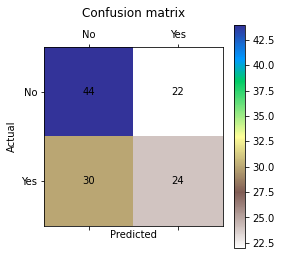

In [159]:

plt.matshow(knncm,cmap = plt.cm.terrain_r)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
for y in range(knncm.shape[0]):
    for x in range(knncm.shape[1]):
        plt.text(x, y, '{}'.format(knncm[y,x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

#### Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results)

In [177]:
val_range = np.arange(1,15)
val_range

train_matrix_euc =np.empty(len(val_range))
test_matrix_euc = np.empty(len(val_range))


train_matrix_man =np.empty(len(val_range))
test_matrix_man = np.empty(len(val_range))

train_matrix_uniform =np.empty(len(val_range))
test_matrix_uniform = np.empty(len(val_range))

for i, n_neighbors in enumerate(val_range):
    
    knnclf = KNeighborsClassifier(n_neighbors, weights='distance',metric='euclidean')
    knnclf.fit(vs_train_norm, vs_target_train)
    knnpreds_test = knnclf.predict(vs_test_norm)
    
    train_score = np.round(knnclf.score(vs_train,vs_target_train),2)
    test_score = np.round(knnclf.score(vs_test,vs_target_test),2)
    
    train_matrix_euc[i]=train_score
    test_matrix_euc[i]=test_score
    
    print("\n Weight = Distance (Euc)  => n_neighbors = ",n_neighbors," Train score : ",train_score," Test score : ",test_score)
    
    knnclf = KNeighborsClassifier(n_neighbors, weights='distance',metric='manhattan')
    knnclf.fit(vs_train_norm, vs_target_train)
    knnpreds_test = knnclf.predict(vs_test_norm)
    
    train_score = np.round(knnclf.score(vs_train_norm,vs_target_train),2)
    test_score = np.round(knnclf.score(vs_test_norm,vs_target_test),2)
    
    train_matrix_man[i]=train_score
    test_matrix_man[i]=test_score
    
    print(" Weight = Distance (Man)  => n_neighbors = ",n_neighbors," Train score : ",train_score," Test score : ",test_score)
    
    knnclf = KNeighborsClassifier(n_neighbors, weights='uniform')
    knnclf.fit(vs_train_norm, vs_target_train)
    knnpreds_test = knnclf.predict(vs_test_norm)
    
    test_score = np.round(knnclf.score(vs_test_norm,vs_target_test),2)
    train_score = np.round(knnclf.score(vs_train_norm,vs_target_train),2)
    
    train_matrix_uniform[i]=train_score
    test_matrix_uniform[i]=test_score
    
    print(" Weight = Uniform         => n_neighbors = ",n_neighbors," Train score : ",train_score," Test score : ",test_score)
    


 Weight = Distance (Euc)  => n_neighbors =  1  Train score :  0.7  Test score :  0.62
 Weight = Distance (Man)  => n_neighbors =  1  Train score :  0.7  Test score :  0.62
 Weight = Uniform         => n_neighbors =  1  Train score :  0.7  Test score :  0.62

 Weight = Distance (Euc)  => n_neighbors =  2  Train score :  0.71  Test score :  0.59
 Weight = Distance (Man)  => n_neighbors =  2  Train score :  0.71  Test score :  0.59
 Weight = Uniform         => n_neighbors =  2  Train score :  0.68  Test score :  0.6

 Weight = Distance (Euc)  => n_neighbors =  3  Train score :  0.75  Test score :  0.55
 Weight = Distance (Man)  => n_neighbors =  3  Train score :  0.75  Test score :  0.55
 Weight = Uniform         => n_neighbors =  3  Train score :  0.73  Test score :  0.56

 Weight = Distance (Euc)  => n_neighbors =  4  Train score :  0.75  Test score :  0.59
 Weight = Distance (Man)  => n_neighbors =  4  Train score :  0.75  Test score :  0.59
 Weight = Uniform         => n_neighbors = 

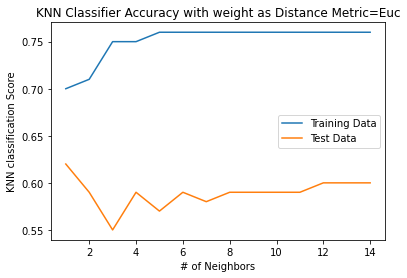

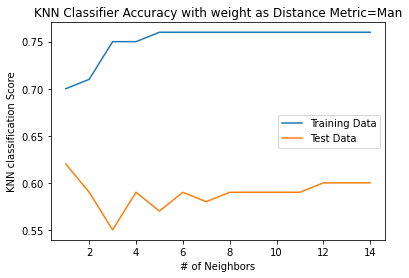

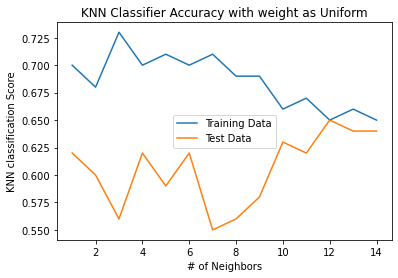

In [178]:
plt.plot(val_range, train_matrix_euc, label = 'Training Data')
plt.plot(val_range, test_matrix_euc, label = 'Test Data')
plt.xlabel('# of Neighbors')
plt.ylabel('KNN classification Score')
plt.title('KNN Classifier Accuracy with weight as Distance Metric=Euc')
plt.legend(loc=7)
plt.show()

plt.plot(val_range, train_matrix_man, label = 'Training Data')
plt.plot(val_range, test_matrix_man, label = 'Test Data')
plt.xlabel('# of Neighbors')
plt.ylabel('KNN classification Score')
plt.title('KNN Classifier Accuracy with weight as Distance Metric=Man')
plt.legend(loc=7)
plt.show()

plt.plot(val_range, train_matrix_uniform, label = 'Training Data')
plt.plot(val_range, test_matrix_uniform, label = 'Test Data')
plt.xlabel('# of Neighbors')
plt.ylabel('KNN classification Score')
plt.title('KNN Classifier Accuracy with weight as Uniform')
plt.legend(loc=10)
plt.show()

#### Findings :  Based on the above score looks like the given data set seem to work perfectly when K=12 and weigh=uniform.
#### With weight=distance, the data seems to be overfit i.e. performs good with training data but poor performance with test data

## 2.c Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [188]:
treeclf = tree.DecisionTreeClassifier()

In [189]:
treeclf = treeclf.fit(vs_train, vs_target_train)
treepreds_test = treeclf.predict(vs_test)
print(treepreds_test)

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [190]:
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.59      0.73      0.65        66
         YES       0.54      0.39      0.45        54

    accuracy                           0.57       120
   macro avg       0.57      0.56      0.55       120
weighted avg       0.57      0.57      0.56       120



In [191]:
treecm  = confusion_matrix(vs_target_test, treepreds_test)
print(treecm )

[[48 18]
 [33 21]]


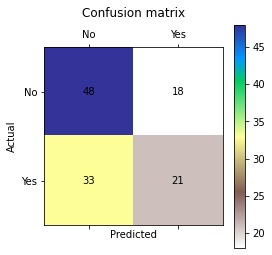

In [192]:

plt.matshow(treecm,cmap = plt.cm.terrain_r)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
for y in range(treecm.shape[0]):
    for x in range(treecm.shape[1]):
        plt.text(x, y, '{}'.format(treecm[y,x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()


In [194]:
print("Test score",treeclf.score(vs_test,vs_target_test))
print("Train score",treeclf.score(vs_train,vs_target_train))

Test score 0.575
Train score 0.7625


#### Finding - from the average score looks like there is huge difference between training and test score and traning data accuracy score is greater than the testing data accuracy score. Looks like there is a data "overfitting" where the model gives a good performance with training data but performs poorly with test data

#### 2.d Create another decision tree model (trained on the non-normalized training data) using "entropy" as the selection criteria, min_samples_split=10, and max_depth=5. For this model generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [195]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=10)


In [196]:
treeclf = treeclf.fit(vs_train, vs_target_train)
treepreds_test = treeclf.predict(vs_test)
print(treepreds_test)

['YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [197]:
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.62      0.70      0.66        66
         YES       0.57      0.48      0.52        54

    accuracy                           0.60       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.60      0.60      0.60       120



In [198]:
treecm  = confusion_matrix(vs_target_test, treepreds_test)
print(treecm )

[[46 20]
 [28 26]]


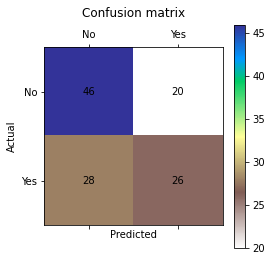

In [199]:
plt.matshow(treecm,cmap = plt.cm.terrain_r)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
for y in range(treecm.shape[0]):
    for x in range(treecm.shape[1]):
        plt.text(x, y, '{}'.format(treecm[y,x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()


In [200]:
print("Test score",treeclf.score(vs_test,vs_target_test))
print("Train score",treeclf.score(vs_train,vs_target_train))

Test score 0.6
Train score 0.725


In [201]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

In [202]:
cv_scores = cross_val_score(treeclf, vs_record_ssf, vs_target, cv=5)
cv_scores

array([0.61, 0.58, 0.58, 0.58, 0.57])

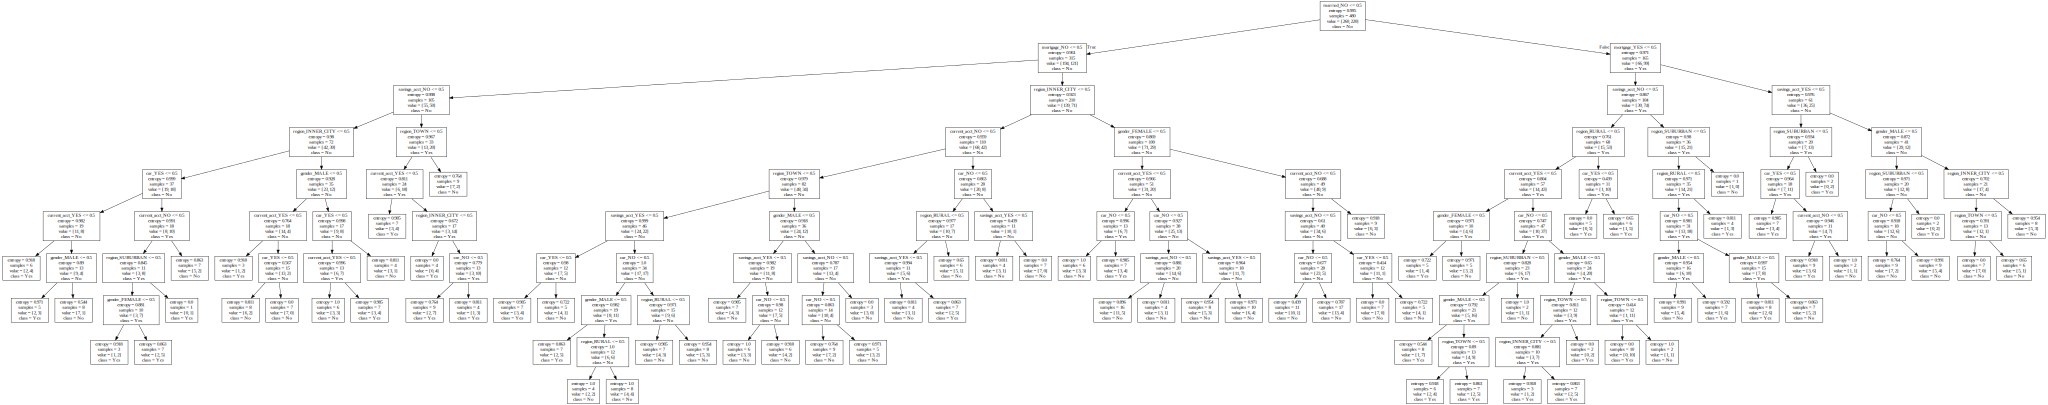

In [207]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [205]:
system(dot -Tpng tree.dot -o dtree.png)

[]

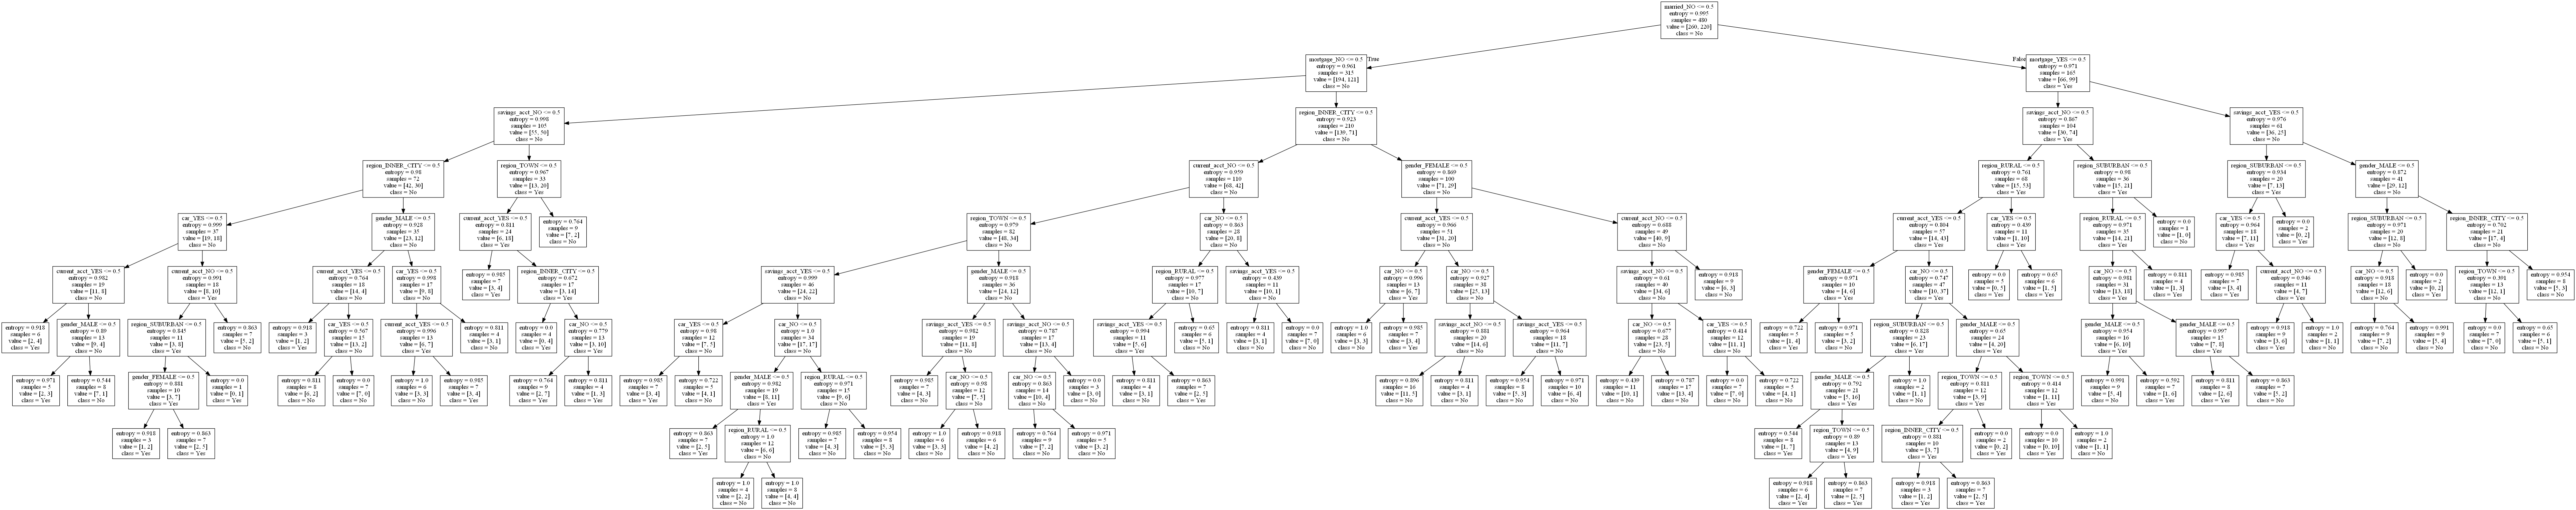

In [208]:
from IPython.display import Image
Image(filename='dtree.png', width=1200, height=800)